**Import Required Libraries**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix


**Data Collection**

In [ ]:
df=pd.read_csv('train (3).csv')


**Data Preprocessing / EDA**

In [ ]:
df.head()

,Tweet,following,followers,actions,is_retweet,location,Type,Unnamed: 7
0,Good Morning Love @LeeBrown_V,0.0,0.0,0.0,0.0,"Pennsylvania, USA",Quality,NaN
1,'@realDonaldTrump @USNavy RIP TO HEROES',42096.0,61060.0,5001.0,0.0,"South Padre Island, Texas",Spam,NaN
2,Haven't been following the news but I understa...,0.0,0.0,NaN,0.0,Will never be broke ever again,Quality,NaN
3,pic.twitter.com/dy9q4ftLhZ What to do with pap...,0.0,0.0,0.0,0.0,Mundo,Quality,NaN
4,#DidYouKnow ► Mahatma Gandhi made a brief visi...,17800.0,35100.0,NaN,0.0,"Nottingham, England",Quality,NaN


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14899 entries, 0 to 14898
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Tweet       14899 non-null  object 
 1   following   14741 non-null  float64
 2   followers   14882 non-null  float64
 3   actions     11462 non-null  float64
 4   is_retweet  14898 non-null  float64
 5   location    12888 non-null  object 
 6   Type        14899 non-null  object 
 7   Unnamed: 7  2 non-null      object 
dtypes: float64(4), object(4)
memory usage: 931.3+ KB


In [ ]:
df=df.drop('Unnamed: 7',axis=1)
df.shape

(14899, 7)

In [ ]:
df.dtypes

Tweet          object
following     float64
followers     float64
actions       float64
is_retweet    float64
location       object
Type           object
dtype: object

In [ ]:
df.isna().sum()

Tweet            0
following      158
followers       17
actions       3437
is_retweet       1
location      2011
Type             0
dtype: int64

In [ ]:
df.groupby('Type').count()

,Tweet,following,followers,actions,is_retweet,location
Type,,,,,,
Quality,7454,7296,7437,4018,7453,5446
South Dakota,2,2,2,1,2,2
Spam,7443,7443,7443,7443,7443,7440


In [ ]:
df=df[df.Type!='South Dakota']

In [ ]:
df.mean()

following       4695.430016
followers     353490.504503
actions         6992.523427
is_retweet         0.249799
dtype: float64

In [ ]:
df['following']=df['following'].fillna(df['following'].mean())

In [ ]:
df['is_retweet']=df['is_retweet'].fillna(df['is_retweet'].mean())

In [ ]:
df['followers']=df['followers'].fillna(df['followers'].mean())

In [ ]:
df['actions']=df['actions'].fillna(df['actions'].mean())

In [ ]:
df['location'].fillna(df['location'].mode()[0], inplace=True)

In [ ]:
df.isna().sum()

Tweet         0
following     0
followers     0
actions       0
is_retweet    0
location      0
Type          0
dtype: int64

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


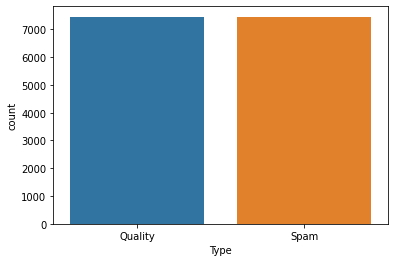

In [ ]:
#understanding the frequency distribution of data in target variable "Type"
sns.countplot(df['Type'],label='count')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f46fb5fe4e0>,
      dtype=object)

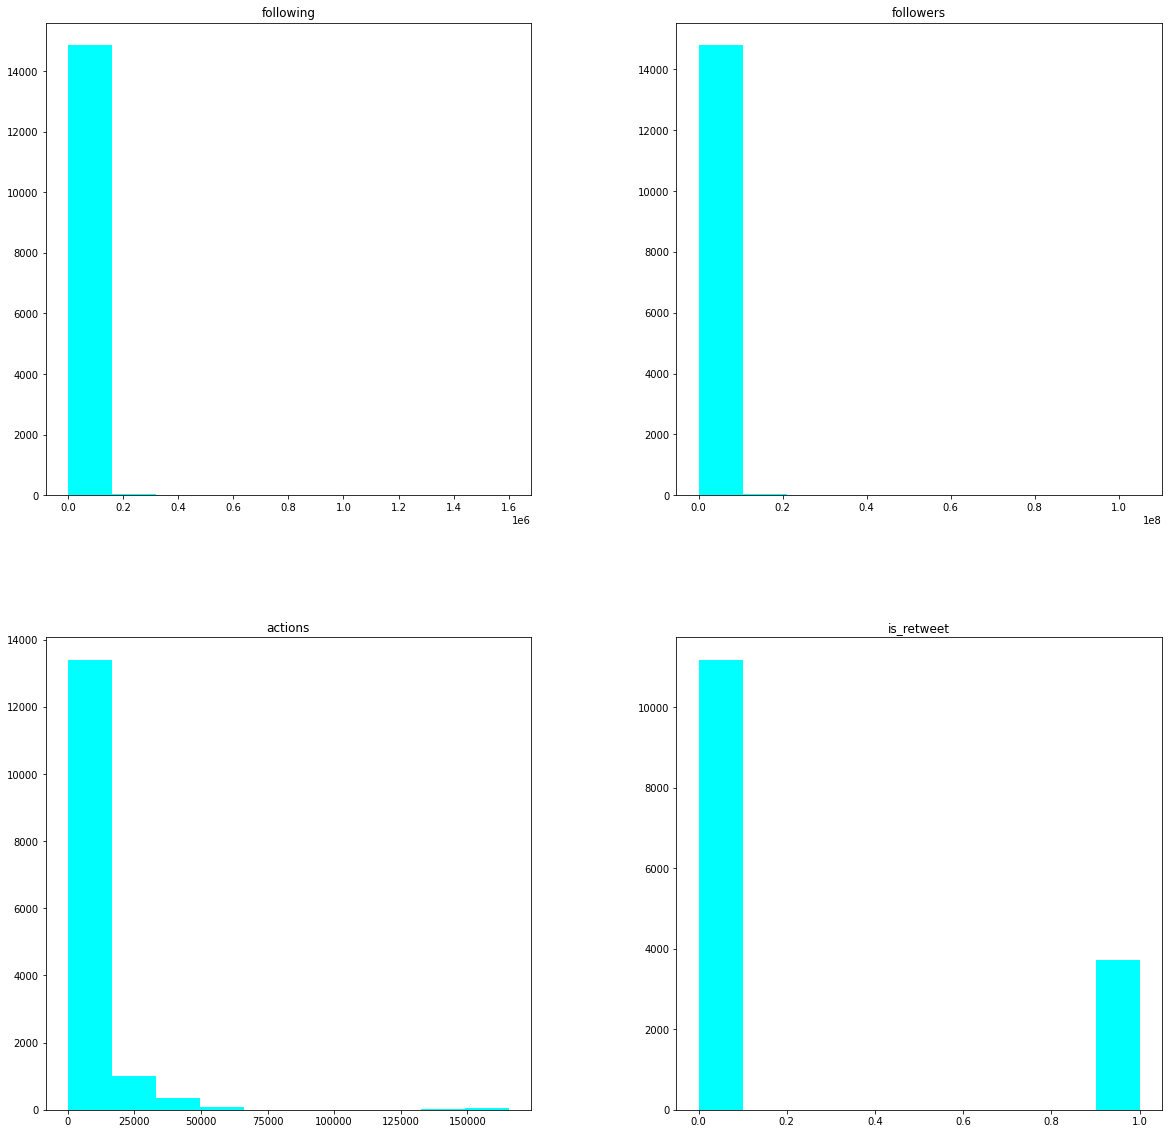

In [ ]:
df.hist(bins=10,figsize=[20,20],grid=False,color="cyan")

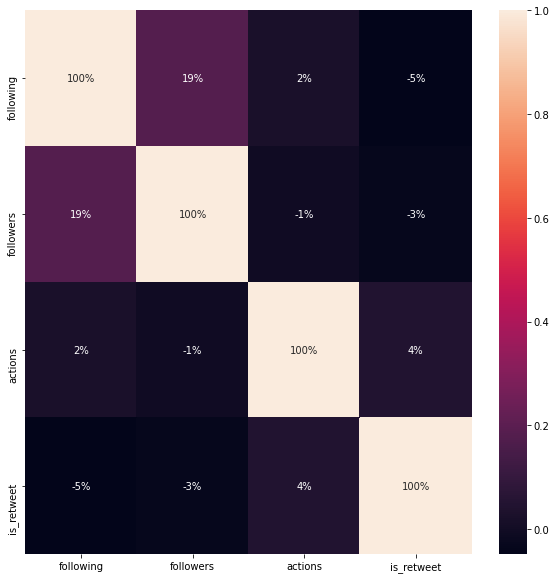

In [ ]:
#visualize the correlation
plt.figure(figsize=(10,10))
sns.heatmap(df.iloc[:,1:6].corr(),annot=True,fmt='.0%')

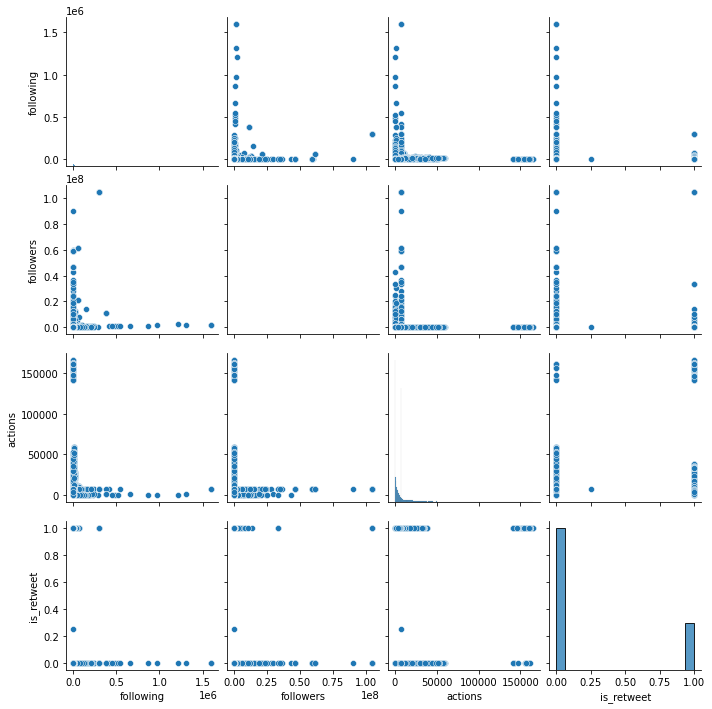

In [ ]:
#create a pair plot
sns.pairplot(df.iloc[:,1:5])

In [ ]:
df['Type']=df.Type.map(dict(Quality=0, Spam=1))

In [ ]:
type(df['Type'])

pandas.core.series.Series

In [ ]:
#correlation of cols
df.iloc[:,1:7].corr()

,following,followers,actions,is_retweet,Type
following,1.000000,0.185139,0.022568,-0.048042,0.003745
followers,0.185139,1.000000,-0.006081,-0.034664,-0.088790
actions,0.022568,-0.006081,1.000000,0.044485,0.268534
is_retweet,-0.048042,-0.034664,0.044485,1.000000,0.374575
Type,0.003745,-0.088790,0.268534,0.374575,1.000000


**Import Required Libraries from NLTK**

In [ ]:
import pandas as pd # our main data management package
import matplotlib.pyplot as plt # our main display package
import string # used for preprocessing
import re # used for preprocessing
import nltk # the Natural Language Toolkit, used for preprocessing
import numpy as np # used for managing NaNs
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords # used for preprocessing
from nltk.stem import WordNetLemmatizer # used for preprocessing
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression # our model
from sklearn.model_selection import train_test_split
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [ ]:
### Vocabulary size
voc_size=5000

In [ ]:
y=df['Type']
x=df[['Tweet', 'following', 'followers', 'actions', 'is_retweet', 'location']]

In [ ]:
import tensorflow as tf

In [ ]:
messages=x.copy()
messages['Tweet'][1]

"'@realDonaldTrump @USNavy RIP TO HEROES'"

In [ ]:
messages.reset_index(inplace=True)

**Text Preprocessing**

In [ ]:
### Dataset Preprocessing
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()
corpus = []
for i in range(0, len(messages)):
    review = re.sub('[^a-zA-Z]', ' ', messages['Tweet'][i])
    review = review.lower()
    review = review.split()

    review = [ps.stem(word) for word in review if not word in stopwords.words('english')]
    review = ' '.join(review)
    corpus.append(review)

In [ ]:
from tensorflow.keras.layers import Embedding
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.preprocessing.text import one_hot

In [ ]:
onehot_repr=[one_hot(words,voc_size)for words in corpus]
onehot_repr[:5]

[[870, 1410, 2518, 3586, 368],
 [772, 3558, 3461, 2818],
 [1884, 3784, 2285, 993, 596, 3130],
 [3286,
  1728,
  513,
  3563,
  3181,
  26,
  3847,
  1379,
  4275,
  4410,
  1252,
  513,
  278,
  1439,
  3847,
  1661,
  1899,
  767,
  1578],
 [3131, 2075, 2791, 3993, 4641, 730, 155, 280, 4390, 2782]]

In [ ]:
sent_length=20
embedded_docs=pad_sequences(onehot_repr,padding='pre',maxlen=sent_length)
print(embedded_docs)

[[   0    0    0 ... 2518 3586  368]
 [   0    0    0 ... 3558 3461 2818]
 [   0    0    0 ...  993  596 3130]
 ...
 [   0    0    0 ... 4468 1571 4003]
 [   0    0    0 ... 4046 2418  870]
 [   0    0    0 ... 3815 2338  300]]


**Splitting data into Training and Testing subsets**

In [ ]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(embedded_docs,y,test_size=0.33,random_state=42)

**MODEL BUILDING USING DATA MINING CLASSIFICATION TECHNIQUES**

**Random Forest**

In [ ]:
from sklearn.ensemble import RandomForestClassifier
d= RandomForestClassifier(n_estimators=2000,criterion='entropy',random_state=20)

In [ ]:
d.fit(xtrain,ytrain)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='entropy', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=2000,
                       n_jobs=None, oob_score=False, random_state=20, verbose=0,
                       warm_start=False)

In [ ]:
ypre=d.predict(xtest)

In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(ytest,ypre)

0.8214358348586537

In [ ]:
from sklearn.metrics import confusion_matrix
confusion_matrix(ytest,ypre)

array([[2162,  339],
       [ 539, 1877]])

In [ ]:
from sklearn import metrics
from sklearn.metrics import accuracy_score
print('Accuracy: ',accuracy_score(ytest,ypre))
print(metrics.classification_report(ytest,ypre))

Accuracy:  0.8214358348586537
              precision    recall  f1-score   support

           0       0.80      0.86      0.83      2501
           1       0.85      0.78      0.81      2416

    accuracy                           0.82      4917
   macro avg       0.82      0.82      0.82      4917
weighted avg       0.82      0.82      0.82      4917



**Naive Bayes**

In [ ]:
from sklearn.naive_bayes import MultinomialNB
clf=MultinomialNB().fit(xtrain,ytrain)

In [ ]:
predicted=clf.predict(xtest)

In [ ]:
from sklearn.metrics import confusion_matrix
confusion_matrix(ytest,predicted)

array([[1280, 1221],
       [ 724, 1692]])

In [ ]:
print('Accuracy: ',accuracy_score(ytest,predicted))
print(metrics.classification_report(ytest,predicted))

Accuracy:  0.6044335977221883
              precision    recall  f1-score   support

           0       0.64      0.51      0.57      2501
           1       0.58      0.70      0.64      2416

    accuracy                           0.60      4917
   macro avg       0.61      0.61      0.60      4917
weighted avg       0.61      0.60      0.60      4917



**Decision Tree**

In [ ]:
from sklearn.tree import DecisionTreeClassifier
dtree=DecisionTreeClassifier(criterion='entropy',random_state=110)


In [ ]:
dtree.fit(xtrain,ytrain)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=110, splitter='best')

In [ ]:
ypredtree=dtree.predict(xtest)
accuracy_score(ytest,ypredtree)

0.8000813504169209

In [ ]:
from sklearn.metrics import confusion_matrix
confusion_matrix(ytest,ypredtree)

array([[2002,  499],
       [ 484, 1932]])

In [ ]:
print('Accuracy: ',accuracy_score(ytest,ypredtree))
print(metrics.classification_report(ytest,ypredtree))

Accuracy:  0.7972340858246898
              precision    recall  f1-score   support

           0       0.80      0.80      0.80      2501
           1       0.79      0.80      0.79      2416

    accuracy                           0.80      4917
   macro avg       0.80      0.80      0.80      4917
weighted avg       0.80      0.80      0.80      4917



**Logistic Regression**

In [ ]:
from sklearn.linear_model import LogisticRegression
log=LogisticRegression(random_state=0)
log.fit(xtrain,ytrain)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=0, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
ypredlog=log.predict(xtest)

In [ ]:
ypredlog

array([0, 1, 0, ..., 1, 0, 1])

In [ ]:
accuracy_score(ytest,ypredlog)

0.6176530404718324

In [ ]:
from sklearn.metrics import confusion_matrix
confusion_matrix(ytest,ypredlog)

array([[1300, 1201],
       [ 679, 1737]])

In [ ]:
from sklearn import metrics
from sklearn.metrics import accuracy_score
print('Accuracy: ',accuracy_score(ytest,ypredlog))
print(metrics.classification_report(ytest,ypredlog))

Accuracy:  0.6176530404718324
              precision    recall  f1-score   support

           0       0.66      0.52      0.58      2501
           1       0.59      0.72      0.65      2416

    accuracy                           0.62      4917
   macro avg       0.62      0.62      0.61      4917
weighted avg       0.62      0.62      0.61      4917



In [ ]:
import os
import tweepy as tw
import pandas as pd

In [ ]:
consumer_key= 'qwpUugHsTcoxDniUvlTYJmHzy'
consumer_secret= 'MhQe3H4QLUxL2JVSQ2M7eB6IMv1tf4eOMu6MMViMDYZi7k5r55'
access_token= '1322563941843628032-y3bEMCWrOMbNuPdIv1Y61zVEsHywpQ'
access_token_secret= 'Oj4PSeK8w2vui4IZr64dmIjFLDInNv3yRKtXxrLDEFull'

In [ ]:
auth = tw.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
api = tw.API(auth, wait_on_rate_limit=True)

In [ ]:
# Define the search term and the date_since date as variables
search_words = "#Trump "
date_since = "2008-01-01"

In [ ]:
# Collect tweets
tweets = tw.Cursor(api.search,
              q=search_words,
              lang="en",
              since=date_since).items(800)
tweets

In [ ]:

# Iterate and print tweets
msg=pd.DataFrame()
l=[]
'''
for tweet in tweets:
  print(tweet.text)'''
for i in tweets:
  l.append(i.text)
msg=pd.DataFrame(l)
msg.columns=['Text']
msg

,Text
0,The latest More @SteveBeste! https://t.co/s7D2...
1,RT @Tombx7M: @LLinWood @SidneyPowell1 \nIf the...
2,RT @Tombx7M: @LLinWood @SidneyPowell1 \nIf the...
3,#Trump is the last Realist political leader......
4,I thought America was great again #MAGA But I ...
...,...
795,"RT @Laurie_Garrett: CONCEDE, MR. TRUMP. EVERY ..."
796,#US President-elect Joe #Biden says that incum...
797,A Bull in the China Shop can only break so man...
798,"RT @Dakotadamus: $10,000 cash give giveaway: I..."


In [ ]:
### Dataset Preprocessing
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()
crp = []
for i in range(0, len(msg)):
    review = re.sub('[^a-zA-Z]', ' ', msg['Text'][i])
    review = review.lower()
    review = review.split()

    review = [ps.stem(word) for word in review if not word in stopwords.words('english')]
    review = ' '.join(review)
    crp.append(review)

In [ ]:
onehot=[one_hot(words,voc_size)for words in crp]
onehot[:5]

[[1265, 4454, 4410, 921, 1972, 4687, 4927, 4478, 360, 785],
 [4284, 952, 3998, 3766, 2127, 4811, 4138, 1653, 438, 2255, 62, 2127],
 [4284, 952, 3998, 3766, 2127, 4811, 4138, 1653, 438, 2255, 62, 2127],
 [785,
  1737,
  4448,
  360,
  2428,
  438,
  1501,
  1970,
  2125,
  4003,
  4410,
  921,
  4960,
  4662,
  3382],
 [4899,
  1034,
  1729,
  4641,
  4858,
  4513,
  4114,
  3656,
  3347,
  543,
  1440,
  4410,
  921,
  699]]

In [ ]:
sent_length=20
embedded_docs=pad_sequences(onehot,padding='pre',maxlen=sent_length)
print(embedded_docs)

[[   0    0    0 ... 4478  360  785]
 [   0    0    0 ... 2255   62 2127]
 [   0    0    0 ... 2255   62 2127]
 ...
 [   0    0    0 ... 4410  921 4854]
 [   0    0    0 ...  786 2768 4267]
 [   0    0    0 ... 1454  133 4624]]


In [ ]:
tweet_pred=d.predict(embedded_docs)

In [ ]:
tweet_pred

array([0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0,
       1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1,
       1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1,
       0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1,
       1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1,
       1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,

In [ ]:
type(tweet_pred)


numpy.ndarray

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


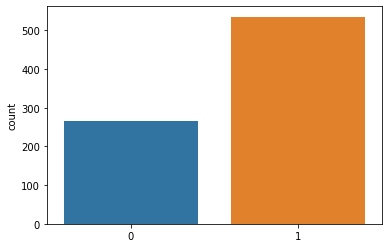

In [ ]:
sns.countplot(tweet_pred,label='count')

In [ ]:
tweet_prediction=pd.DataFrame(tweet_pred)
tweet_prediction.columns=['Type']

In [ ]:
tweet_prediction

,Type
0,0
1,0
2,0
3,1
4,1
...,...
795,0
796,1
797,1
798,0


In [ ]:
msg=pd.concat([msg, tweet_prediction], axis=1)

In [ ]:
msg['Type']=msg['Type'].apply(lambda x: 'Quality' if x == 0 else 'Spam' )

In [ ]:
msg['Type']

0      Quality
1      Quality
2      Quality
3         Spam
4         Spam
        ...   
795    Quality
796       Spam
797       Spam
798    Quality
799    Quality
Name: Type, Length: 800, dtype: object

In [ ]:
msg

,Text,Type
0,The latest More @SteveBeste! https://t.co/s7D2...,Quality
1,RT @Tombx7M: @LLinWood @SidneyPowell1 \nIf the...,Quality
2,RT @Tombx7M: @LLinWood @SidneyPowell1 \nIf the...,Quality
3,#Trump is the last Realist political leader......,Spam
4,I thought America was great again #MAGA But I ...,Spam
...,...,...
795,"RT @Laurie_Garrett: CONCEDE, MR. TRUMP. EVERY ...",Quality
796,#US President-elect Joe #Biden says that incum...,Spam
797,A Bull in the China Shop can only break so man...,Spam
798,"RT @Dakotadamus: $10,000 cash give giveaway: I...",Quality
